# Các mẫu thiết kế GOF : Builder

**BS. Lê Ngọc Khả Nhi**

# Giới thiệu

Builder là một mẫu thiết kế thuộc nhóm Tạo lập (Creational), cho phép xây dựng một đối tượng có cấu trúc phức tạp theo từng bước một, cũng như tùy biến/tổ hợp giữa các bộ phận riêng biệt để tạo ra nhiều phiên bản khác nhau của đối tượng này.

# Thí dụ minh họa

Có lẽ minh họa dễ hiểu nhất về một đối tượng có cấu tạo từ nhiều bộ phận riêng lẻ, đó là biểu đồ thống kê. Thí dụ, biểu đồ Bland-Altman khá 'fancy' sau đây là sự tổ hợp từ 4 bộ phận:

!['ba_plot'](fancy_BA.png)

1) Basic_plot: Một biểu đồ tán xạ (scatter-dot plot) trình bày liên hệ giữa sai biệt giữa 2 phép đo (measurement bias) trên trục Y và thang đo tham chiếu (Reference) của đại lượng cần khảo sát trên trục X. Đây chính là biểu đồ Bland-Altman cổ điển

2) Ref_kde: Ta có thể vẽ thêm 2 biểu đồ mật độ phân phối 1 chiều cho phép so sánh đặc tính phân bố của giá trị đại lượng X khảo sát bởi 2 kỹ thuật đo.

3) Bias_kde: 1 biểu đồ mật độ phân phối của sai biệt giữa 2 phép đo (bias) 

4) 2D_KDE: 1 lớp biểu đồ mật độ phân bố 2 chiều trình bày mật độ phân bố của xác suất kết hợp giữa Bias Y và giá trị đại lượng X bởi phép đo tham chiếu (Reference).

# Giải quyết vấn đề bằng thiết kế Builder

Khi vận dụng mẫu thiết kế Builder, thay vì viết code để xây dựng toàn bộ sản phẩm (Biểu đồ Bland Altman fancy) trong 1 hàm hoặc 1 method duy nhất, ta sẽ tháo rời từng bộ phận cấu tạo nên sản phẩm này, sau đó trích xuất các phân đoạn code tương ứng với từng bộ phận thành các method nhỏ, riêng biệt trong một class Builder. Class Builder này có thể được vận hành trực tiếp, hoặc gián tiếp thông qua một class khác có vai trò chỉ huy (Director). Trong class Director ta sẽ tạo ra những method tương ứng với những biến thể sản phẩm khác nhau, thí dụ method để vẽ 1 biểu đồ Bland-Altman cơ bản (chỉ dùng basic plot), hoặc vẽ 1 biểu đồ chỉ có bias_kde (basic plot kết hợp với bias kde), hoặc dùng toàn bộ các bộ phận để tạo ra biểu đồ 'fancy'.


## Cấu trúc module:

Sơ đồ UML của hệ thống như sau:

!['uml'](builder_UML.png)

Nội dung của code nằm trong module builder.py tại: https://github.com/kinokoberuji/Python-snipets/blob/master/GOF/Builder/builder.py

## Triển khai:

1) IGraph là interface của class BA_tool, được tạo ra từ abstract class, bên trong có 5 abstract methods: 

2) BA_tool là concrete class, có vai trò như một bộ máy thực hiện quy trình sản xuất ra 1 biểu đò Bland-Altman bằng cách tổ hợp giữa 5 method: Bắt đầu bằng basic_plot, sau đó có thể ghép thêm ref_kde, bias_kde, hoặc 2D_kde, và kết thúc bằng method draw_plot.

3) Class Bland-Altman, có vai trò chỉ huy, bên trong có 6 methods tương ứng với 6 dạng biểu đồ Bland-Altman khác nhau. Class này bao gồm 1 instance của class BA_tool, theo cơ chế Composition.

4) Người dùng có thể sử dụng trực tiếp class BA_tool hoặc gián tiếp thông qua class Bland_Altman

## Sử dụng

Nhi import module builder.py

In [1]:
from builder import*
%config InlineBackend.figure_format = 'png'

Tiếp theo, tải bộ dữ liệu minh họa Sleeptracker.xlsx (https://github.com/kinokoberuji/Python-snipets/blob/master/GOF/Builder/Sleeptracker.xlsx)

vào dataframe df, data này có nội dung kiểm định độ chính xác của 1 thiết bị theo dõi giấc ngủ tích hợp trên đồng hồ SmartWatch, so với kỹ thuật tham chiếu là đa ký giấc ngủ (PSG).

In [2]:
df = pd.read_excel('Sleeptracker.xlsx')

df

,ID,PSG,SmartWatch
0,85,444.0,462.0
1,86,534.0,462.0
2,88,462.0,450.0
3,89,510.0,492.0
4,91,456.0,408.0
...,...,...,...
371,976,420.0,408.0
372,982,414.0,450.0
373,983,426.0,444.0
374,984,360.0,378.0


Ta khởi tạo 2 instance từ class BA_tool (vai trò Builder) và Bland_Altman (vai trò Director).

In [4]:
BA_plot = BA_tool(df = df, ref = 'PSG', targ = 'SmartWatch') # Builder riêng

BA_analysis = Bland_Altman(df = df, ref = 'PSG', targ = 'SmartWatch') # Director

Ta có thể bắt đầu tạo ra những phiên bản biểu đồ khác nhau tùy ý thích:

<Figure size 1400x800 with 0 Axes>

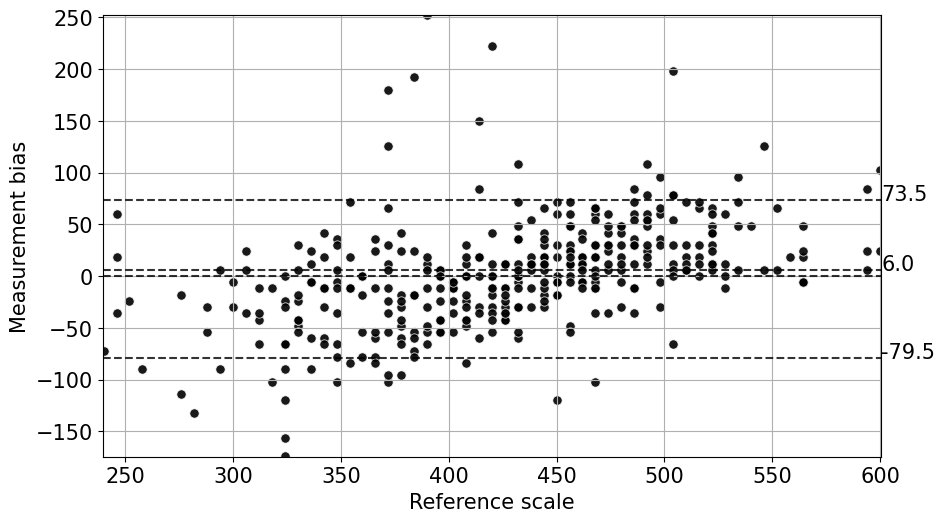

In [4]:
BA_analysis.plot_basic_ba()

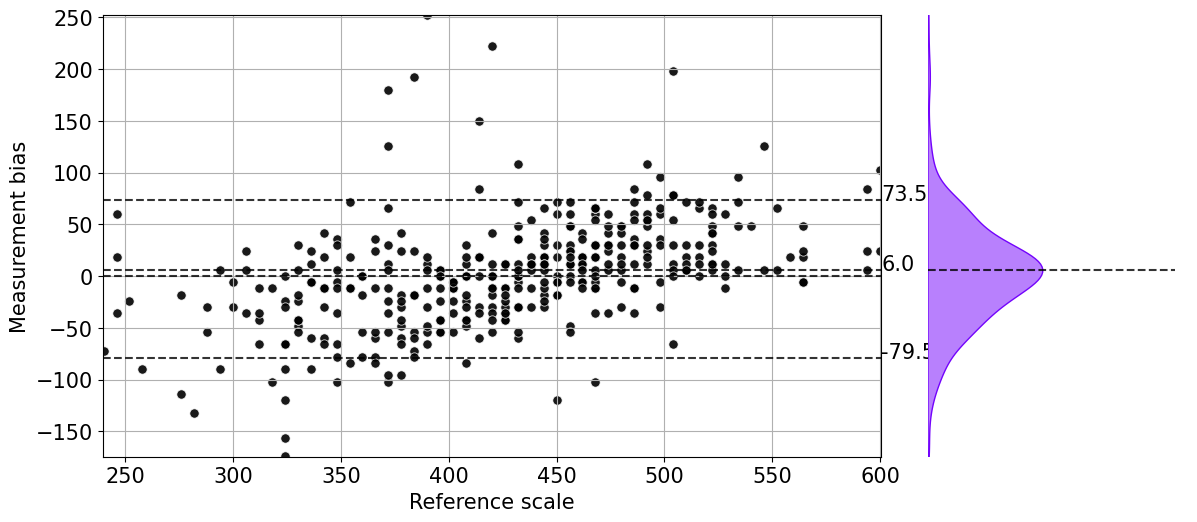

In [5]:
BA_analysis.plot_bias_kde_ba()

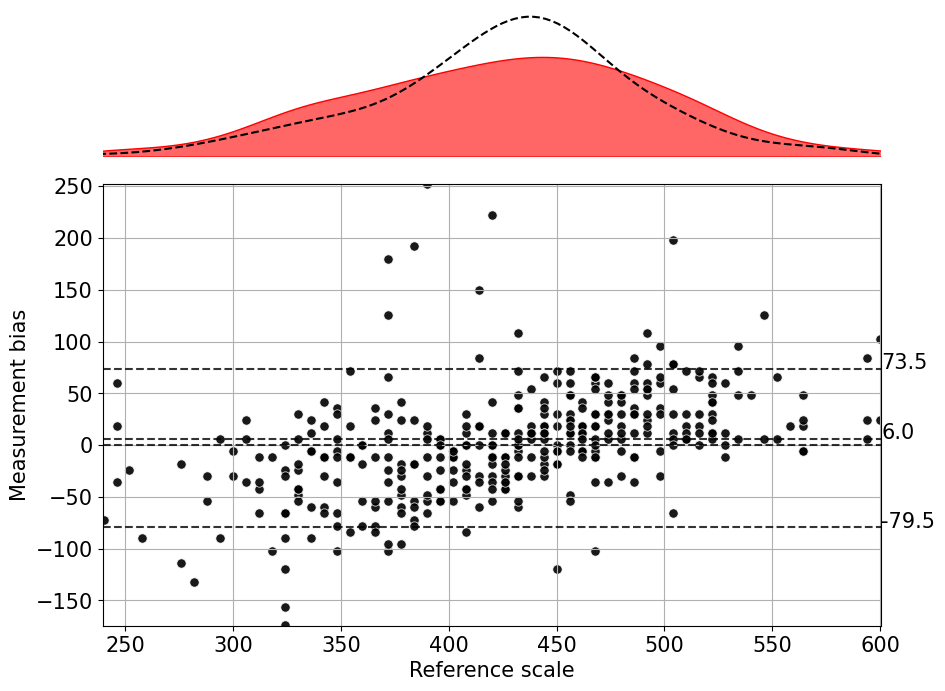

In [6]:
BA_analysis.plot_ref_kde_ba()

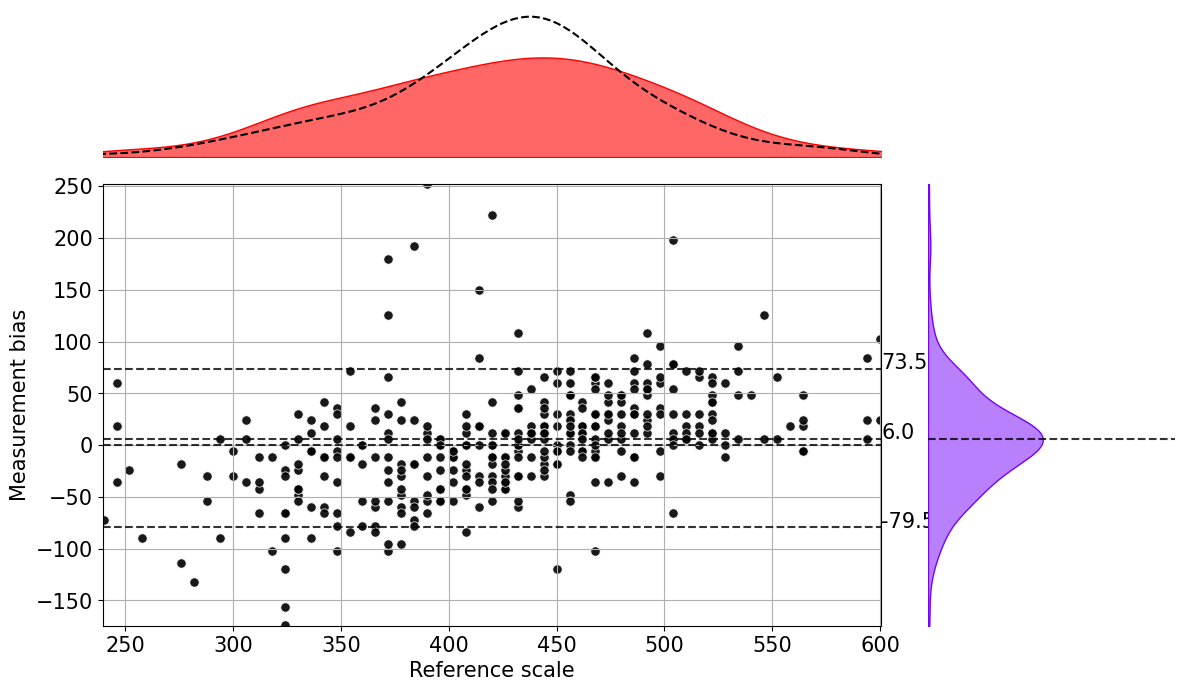

In [7]:
BA_analysis.plot_full_1D_kde()

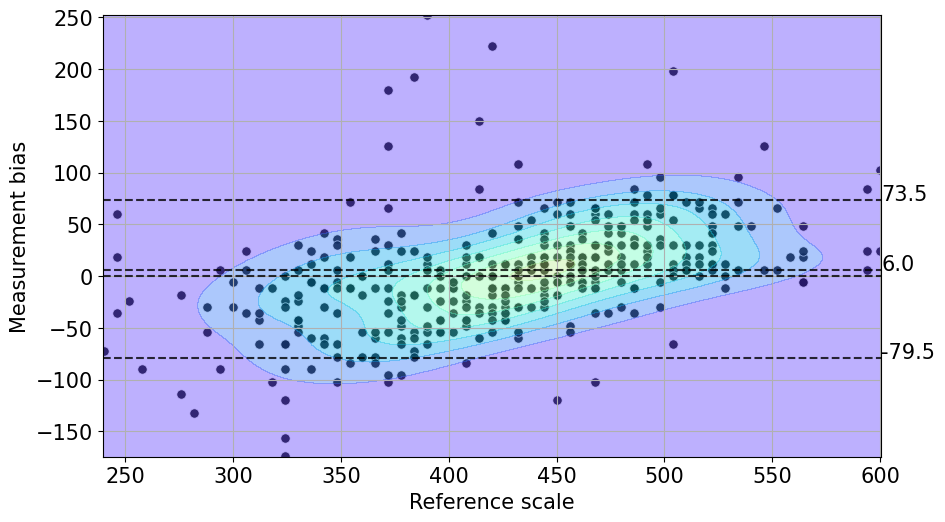

In [8]:
BA_analysis.plot_2D_kde_ba()

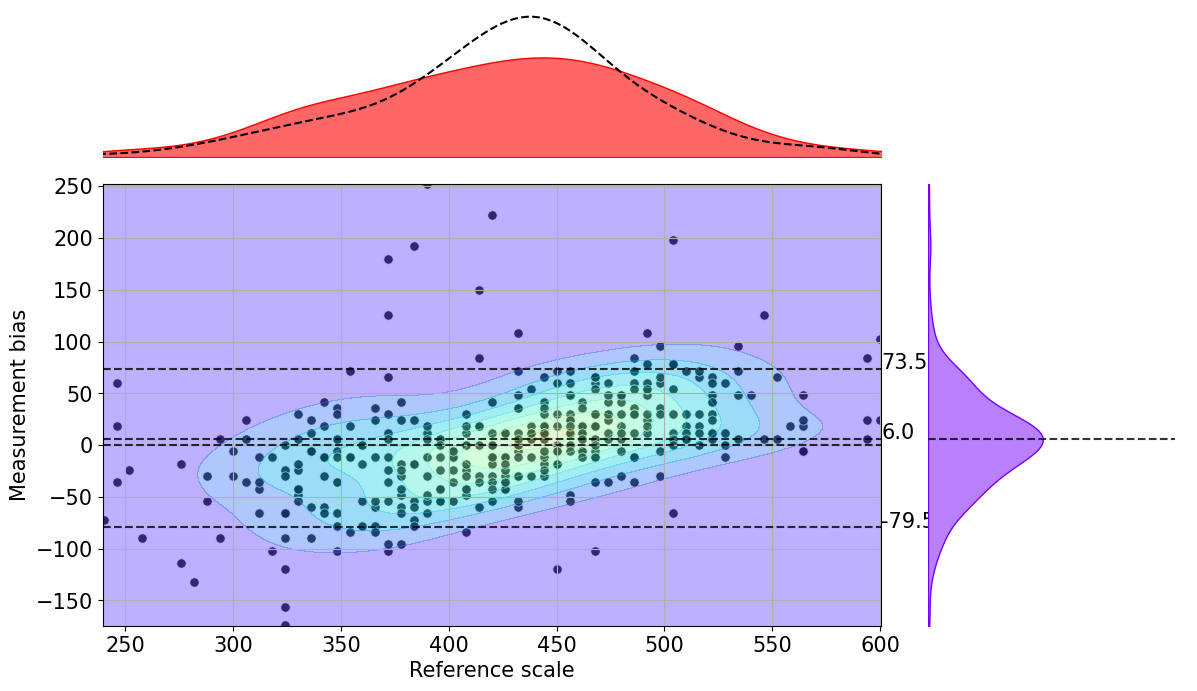

In [10]:
BA_analysis.plot_fancy_ba()

Ta hoàn toàn có thể sử dụng độc lập class Builder mà không cần chịu chi phối bởi class Director:

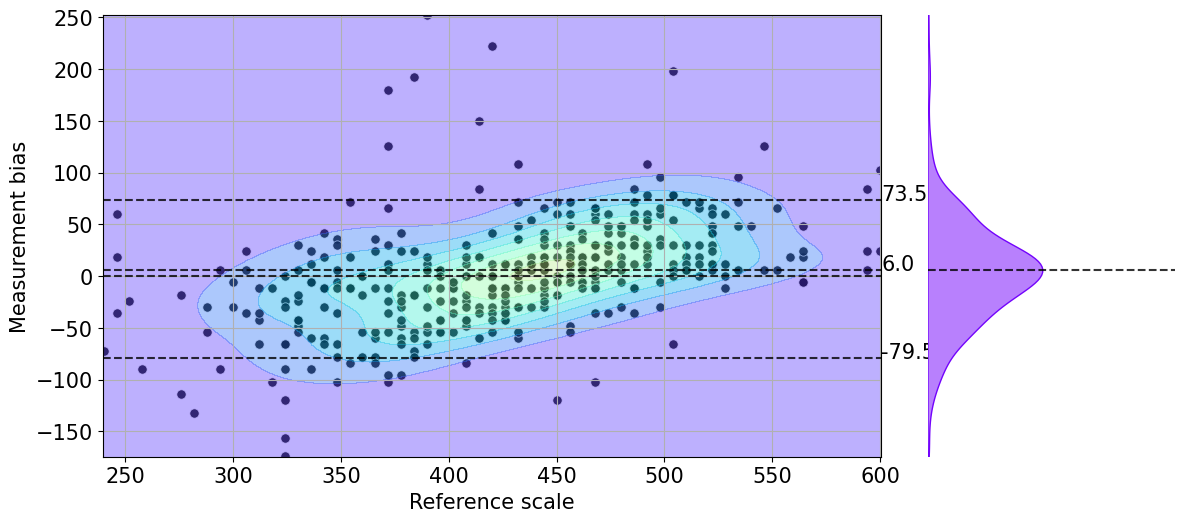

In [7]:
BA_plot.basic_plot()
BA_plot.add_2D_kde()
BA_plot.add_bias_kde()
BA_plot.draw_graph()

# Nhận xét

Mẫu thiết kế Builder cho phép tái cấu trúc chương trình một cách có thứ bậc, gọn gàng với những method độc lập, đơn giản (thỏa tiêu chí Single Responsibility Principle: mỗi hàm chỉ làm 1 việc duy nhất), thay vì sử dụng những hàm/method với quá nhiều arguments, nội dung dài dòng phức tạp với các khối điều kiện if/else. Mẫu thiết kế này rất hữu dụng khi ta cần giải quyết quy trình có tính chất thứ bậc và yêu cầu khả năng tùy biến nhất định bằng cách tổ hợp giữa các công đoạn/bộ phận khác nhau theo một trình tự/cấu trúc tùy chọn.

Bài thực hành đến đây là hết, chúc các bạn thực hành vui và hẹn gặp lại !